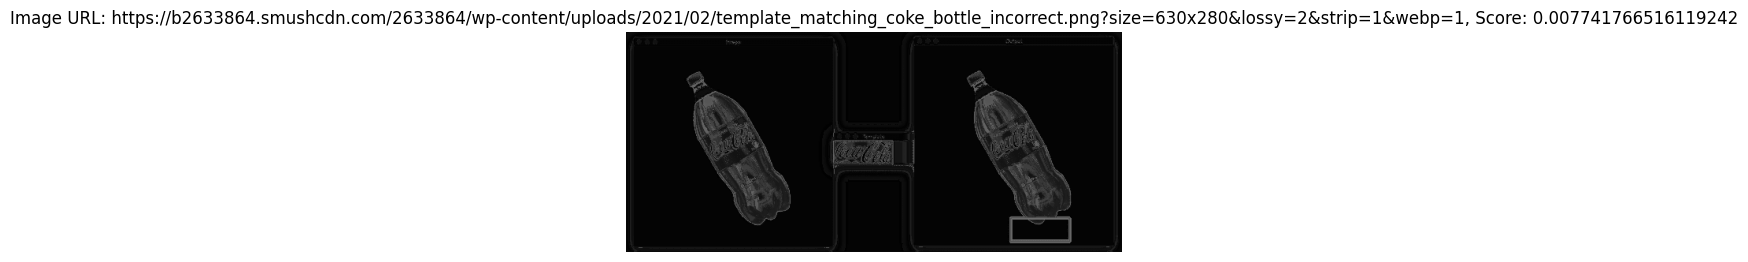

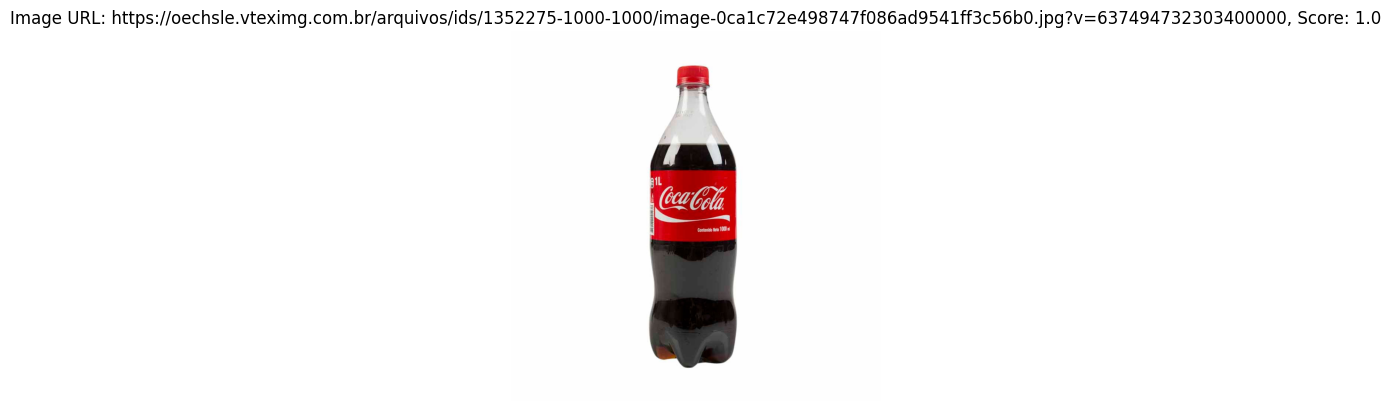

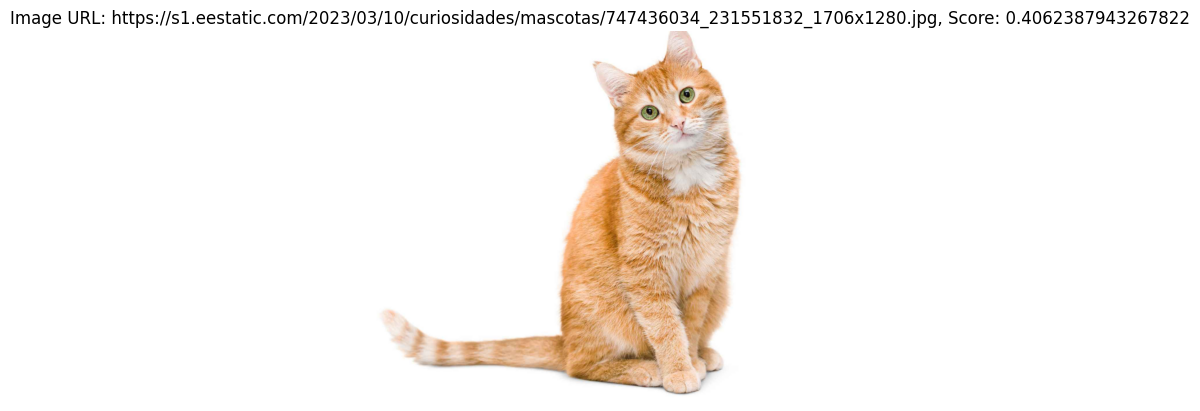

In [3]:
import cv2
import requests
from io import BytesIO
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def download_image(url):
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    return cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

def compare_images(base_image_url, images_to_compare_urls):
    base_image = download_image(base_image_url)
    base_image_gray = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY)

    scores = {}
    for image_url in images_to_compare_urls:
        image_to_compare = download_image(image_url)
        image_to_compare_gray = cv2.cvtColor(image_to_compare, cv2.COLOR_BGR2GRAY)

        # Resize the images to match
        base_image_gray_resized = cv2.resize(base_image_gray, (image_to_compare_gray.shape[1], image_to_compare_gray.shape[0]))

        # Match template
        result = cv2.matchTemplate(image_to_compare_gray, base_image_gray_resized, cv2.TM_CCOEFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
        scores[image_url] = max_val

    return scores

base_image_url = 'https://wongfood.vtexassets.com/arquivos/ids/624580-800-auto?v=638155349024400000&width=800&height=auto&aspect=true'
images_to_compare_urls = ['https://wongfood.vtexassets.com/arquivos/ids/624580-800-auto?v=638155349024400000&width=800&height=auto&aspect=true','https://wongfood.vtexassets.com/arquivos/ids/624585-800-auto?v=638155350518300000&width=800&height=auto&aspect=true','https://www.ofimarket.pe/cdn/shop/products/pr06513_800x.jpg?v=1629266710']

scores = compare_images(base_image_url, images_to_compare_urls)

for image_url, score in scores.items():
    image = download_image(image_url)
    plt.figure()
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'Image URL: {image_url}, Score: {score}')
    plt.axis('off')
    plt.show()
